In [40]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import json
from scipy import stats

In [2]:
df = pd.read_csv('diem_thi.csv')

In [3]:
df.head()

,Math,Physic,Chemistry,Biography
0,5.5,7.0,6.5,9.5
1,2.0,7.5,2.5,6.0
2,6.0,1.0,1.0,4.0
3,6.5,10.0,1.5,6.0
4,1.0,7.0,10.0,2.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Math       200 non-null    float64
 1   Physic     200 non-null    float64
 2   Chemistry  200 non-null    float64
 3   Biography  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
if(df.isna().sum().sum() != 0):
    for col in df.columns:
        if(df[col].isnull().any()):
            df[col].fillna(0, inplace=True)

In [6]:
data_analyze = {}

In [7]:
def process_and_save_plot(df, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    for column_name in df.columns:
        # Tạo bảng thống kê từ cột cần xử lý
        df_temp = df[column_name]
        
        
        #Thong ke diem và so lan xuat hien
        thong_ke = df_temp.value_counts().sort_index()
        thong_ke = thong_ke.rename_axis('score').reset_index(name='number_appearance')
        # print(thong_ke)
        total_score=thong_ke['number_appearance'].sum()
        plt.figure(figsize=(10, 6))
        
        ax = sns.barplot(x='score', y='number_appearance', data=thong_ke, color='skyblue')
        # ax = sns.lineplot(x="score", y="number_appearance", data=thong_ke, color='skyblue') 
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')



        # Đặt tên cho trục x và trục y
        plt.title(f'Biểu đồ phân phối điểm của môn  {column_name}')
        plt.xlabel('Điểm')
        plt.ylabel('Số lần xuất hiện')
        
        
        plt.savefig(os.path.join(save_path, f'{column_name}_distribution.jpg'))
        #plt.show()
        
        #Tim diem cao nhat, thap nhat va so lan xuat hien cua no
        max_score = thong_ke['score'].max()
        max_score_frequency = thong_ke.loc[thong_ke['score'].idxmax(), 'number_appearance']
        min_score = thong_ke['score'].min()
        min_score_frequency = thong_ke.loc[thong_ke['score'].idxmin(), 'number_appearance']
        
        #Diem co so lan xuat hien nhieu nhat, va diem do
        highest_appearances = thong_ke.loc[thong_ke['number_appearance'].idxmax(), 'number_appearance']
        score_highest_appearances = thong_ke[thong_ke['number_appearance'] == highest_appearances]['score'].values
        
        
        second_max_appearances = thong_ke[thong_ke['number_appearance'] < highest_appearances]['number_appearance'].max()
        second_max_score_row = thong_ke[thong_ke['number_appearance'] == second_max_appearances]
        print(second_max_appearances)
        
        
        #So luong diem > 8
        total_scores_above_eight = (thong_ke[thong_ke['score'] >= 8]['number_appearance']).sum()
        total_scores_below_four = (thong_ke[thong_ke['score'] <=4]['number_appearance']).sum()
        data_analyze[column_name] = {
            'total_score': int(total_score),
            'total_scores_above_eight': int(total_scores_above_eight),
            'total_scores_below_four': int(total_scores_below_four),
            'max_score': max_score,
            'max_score_frequency': int(max_score_frequency),
            'min_score': min_score,
            'min_score_frequency': int(min_score_frequency),
            'highest_appearances': int(highest_appearances),
            'score_highest_appearances': list(score_highest_appearances)
        }
        
    
    with open('summary.json', 'w') as file:
        json.dump(data_analyze, file)

15
14
14
15


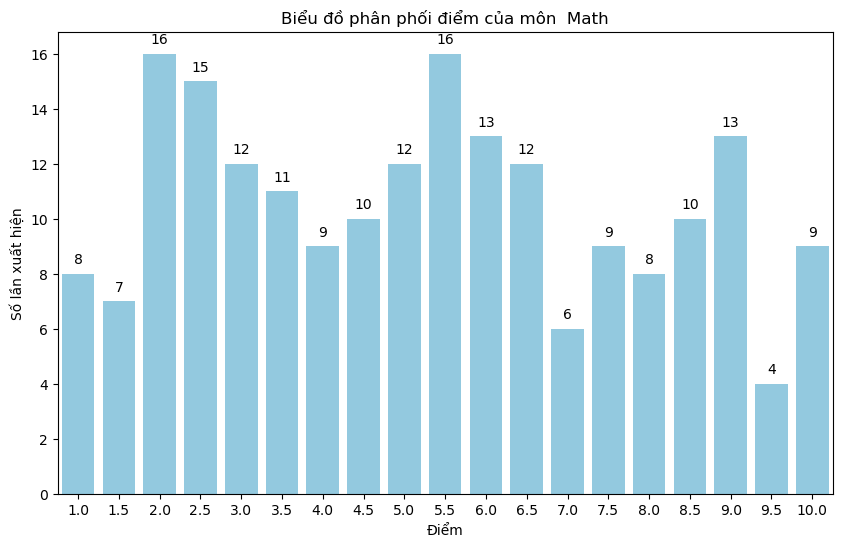

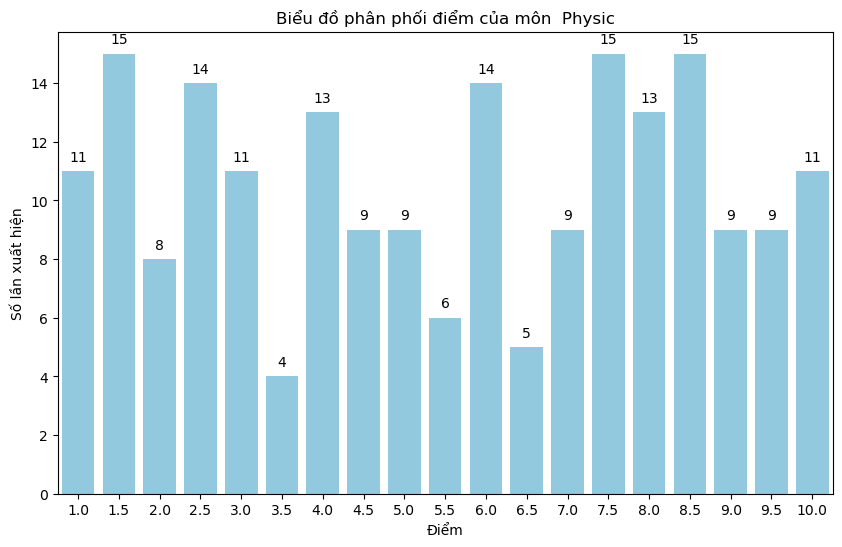

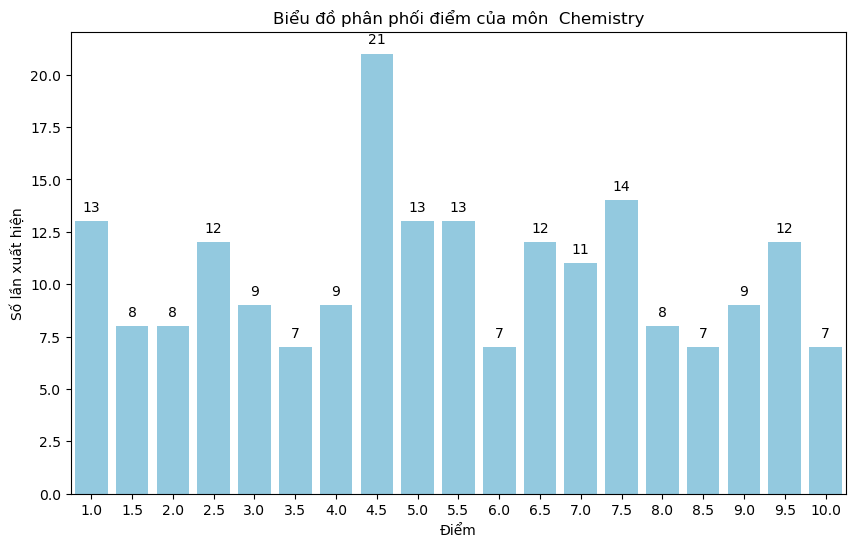

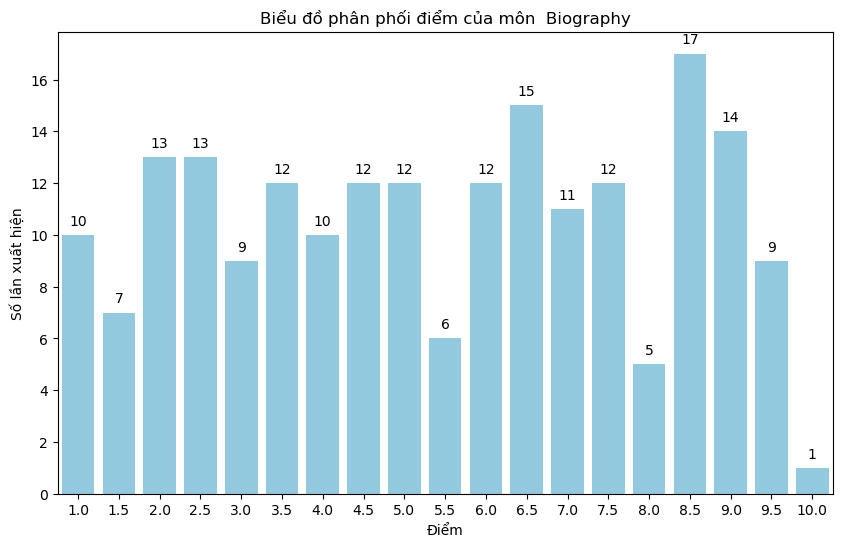

In [23]:
process_and_save_plot(df, 'data')

In [42]:
alpha = 0.05

def check_normal_distribution(df_temp):
    df_score = df_temp.rename_axis('index').reset_index(name='score')
    statistic_score, p_value = stats.shapiro(df_score)
    print("Shapiro-Wilk statistic:", statistic_score)
    print("p-value:", p_value)
    
    if p_value > alpha:
        print("Dữ liệu có thể tuân theo phân phối chuẩn")
    else:
        print("Dữ liệu không tuân theo phân phối chuẩn")
    return statistic_score, p_value

In [43]:
df_math = df['Math']
check_normal_distribution(df_math)

Shapiro-Wilk statistic: 0.7754211304786489
p-value: 4.91711271506681e-23
Dữ liệu không tuân theo phân phối chuẩn


(0.7754211304786489, 4.91711271506681e-23)